In [13]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
import math

%matplotlib inline

In [43]:
df = pd.read_csv("data/hw3.csv")

In [44]:
df.head()

,ts,open,high,low,close,volume,volumeUSD,token,chain
0,2021-12-02 14:00:00,22.4150,22.4913,22.0816,22.3516,31502.151631,NaN,UNI,ETH
1,2021-12-02 23:00:00,4.8043,4.8043,4.7426,4.7806,73686.230000,NaN,CRV,ETH
2,2021-12-10 15:00:00,182.4900,NaN,175.2100,175.8600,73736.747000,NaN,SOL,SOL
3,2021-12-10 18:00:00,3978.4300,3989.7400,3932.0000,3972.3400,18508.040102,NaN,ETH,ETH
4,2021-12-08 21:00:00,193.3240,194.2420,192.5640,193.1540,69426.909000,NaN,SOL,SOL


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2667 entries, 0 to 2666
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ts         2667 non-null   object 
 1   open       2667 non-null   float64
 2   high       2163 non-null   float64
 3   low        2378 non-null   float64
 4   close      2531 non-null   float64
 5   volume     2667 non-null   float64
 6   volumeUSD  0 non-null      float64
 7   token      2667 non-null   object 
 8   chain      2667 non-null   object 
dtypes: float64(6), object(3)
memory usage: 187.6+ KB


In [46]:
df['token'].value_counts()

BTC                                   323
COMP                                  322
CRV                                   318
SOL                                   318
USDT                                  314
UNI                                   312
AAVE                                  312
ETH                                   298
<span name="tokenName">UNI</span>      30
<span name="tokenName">ETH</span>      28
<span name="tokenName">USDT</span>     19
<span name="tokenName">CRV</span>      17
<span name="tokenName">SOL</span>      16
<span name="tokenName">AAVE</span>     16
<span name="tokenName">BTC</span>      14
<span name="tokenName">COMP</span>     10
Name: token, dtype: int64

In [47]:
df.duplicated().sum()

307

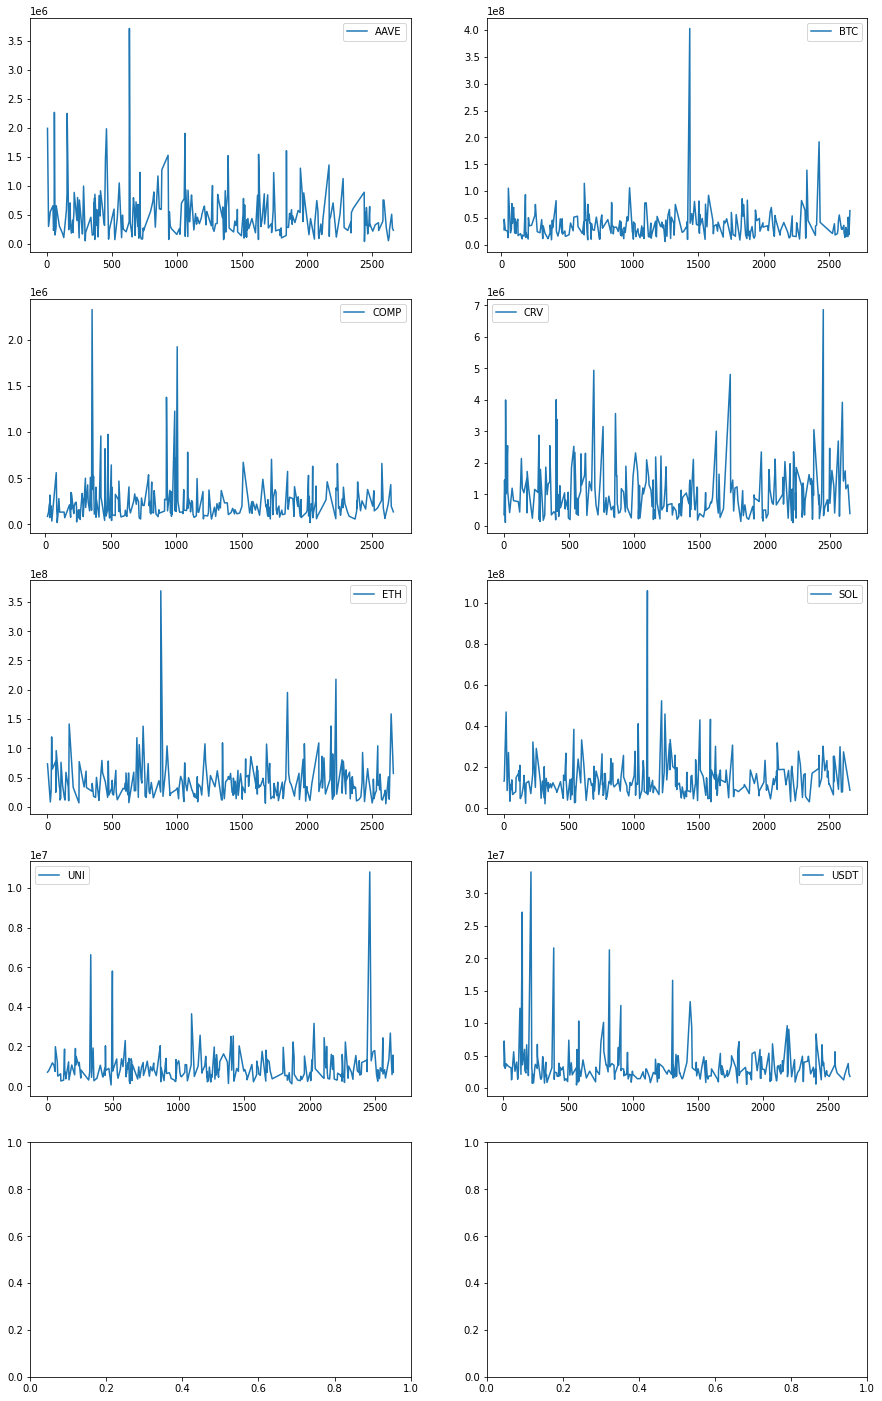

In [63]:
tokens_in_df = df.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_df.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_df.size / 2)))

idx = 0
for label, df_token in df[['token', 'volumeUSD']].groupby('token'):
    df_token['volumeUSD'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1


In [49]:
df = df.drop_duplicates()

In [50]:
df.loc[df['token'].str.contains('<\/span>'), 'token'] = df.loc[df['token'].str.contains('<\/span>'), 'token'].str.extract('<span name=\"tokenName\">(.|\n)*?<\/span>')

In [51]:
df[(df[['close', 'high']].isnull()['close'] * df[['close', 'high']].isnull()['high'])]

,ts,open,high,low,close,volume,volumeUSD,token,chain
18,2021-12-05 16:00:00,190.8120,NaN,181.5000,NaN,2.511136e+05,NaN,SOL,SOL
77,2021-12-10 07:00:00,178.4900,NaN,176.7300,NaN,3.951398e+04,NaN,SOL,SOL
128,2021-12-11 13:00:00,170.2400,NaN,169.8600,NaN,2.604478e+04,NaN,SOL,SOL
130,2021-12-04 08:00:00,16.5753,NaN,16.1110,NaN,1.143725e+05,NaN,UNI,ETH
309,2021-12-09 03:00:00,1.0009,NaN,1.0008,NaN,3.815993e+06,NaN,USDT,USDT
530,2021-12-02 00:00:00,251.1620,NaN,250.0750,NaN,8.301560e+02,NaN,AAVE,ETH
875,2021-12-04 06:00:00,4022.6600,NaN,3575.0000,NaN,9.709742e+04,NaN,ETH,ETH
903,2021-12-04 01:00:00,53633.0200,NaN,53027.0100,NaN,8.411414e+02,NaN,BTC,BTC
904,2021-12-04 01:00:00,19.9560,NaN,19.5569,NaN,7.099149e+04,NaN,UNI,ETH
1104,2021-12-03 16:00:00,56259.0400,NaN,55730.9300,NaN,1.394131e+03,NaN,BTC,BTC


In [53]:
np.isinf(df['close']).any()

False

In [55]:
df.loc[df['high'].isnull(), 'high'] = df[df['high'].isnull()]['open']

In [56]:
df.loc[df['low'].isnull(), 'low'] = df[df['low'].isnull()]['open']

In [57]:
df.loc[df['close'].isnull(), 'close'] = 0.5 * (df[df['close'].isnull()]['high'] + df[df['close'].isnull()]['low'])

In [58]:
df.loc[df['close'] / df['open'] > 2, 'close'] = 0.5 * (df[df['close'] / df['open'] > 2]['high'] + df[df['close'] / df['open'] > 2]['low'])

In [59]:
df.loc[df['close'] / df['open'] < 0.3, 'close'] = 0.5 * (df[df['close'] / df['open'] < 0.3]['high'] + df[df['close'] / df['open'] < 0.3]['low'])

In [62]:
df['volumeUSD'] = df['volume'] * df['close']

In [64]:
df.head()

,ts,open,high,low,close,volume,volumeUSD,token,chain
0,2021-12-02 14:00:00,22.4150,22.4913,22.0816,22.3516,31502.151631,7.041235e+05,UNI,ETH
1,2021-12-02 23:00:00,4.8043,4.8043,4.7426,4.7806,73686.230000,3.522644e+05,CRV,ETH
2,2021-12-10 15:00:00,182.4900,182.4900,175.2100,175.8600,73736.747000,1.296734e+07,SOL,SOL
3,2021-12-10 18:00:00,3978.4300,3989.7400,3932.0000,3972.3400,18508.040102,7.352023e+07,ETH,ETH
4,2021-12-08 21:00:00,193.3240,194.2420,192.5640,193.1540,69426.909000,1.341009e+07,SOL,SOL
